In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_adjusted = pd.read_pickle('../Dataframes/df_compiled_adjusted_daily_temp_gbg_save.pkl')
df_original = pd.read_pickle('../Dataframes/df_compiled_daily_temp_gbg_save.pkl')

In [3]:
def get_first_summer_day_per_year(df, year):    
    for ind, val in df[df['Year'] == year].iterrows():
        if val['Over_10_5_days_in_a_row'] == 1:
            day_of_year = df['day_of_year'][ind-4:ind-3]
            day_of_year = day_of_year.values[0]
            summer_day = pd.to_datetime(f'{year}-{day_of_year}', format='%Y-%j').date()
            return (summer_day, day_of_year)
    return None

In [4]:
def get_first_winter_day_per_year(df, year):    
    for ind, val in df[(df['Year'] == year) & (df['Month'] > 6)].iterrows():
        if val['0_or_under_5_days_in_a_row'] == 1:
            day_of_year = df['day_of_year'][ind-4:ind-3]
            day_of_year = day_of_year.values[0]
            winter_day = pd.to_datetime(f'{year}-{day_of_year}', format='%Y-%j').date()
            print(winter_day)
            return (winter_day, day_of_year)
    return None

In [5]:
first_year = df_original['Year'][0]
last_year = df_original['Year'][-1:].values[0]

Original

In [6]:
df_original['Over_10_5_days_in_a_row'] = 0
df_original['0_or_under_5_days_in_a_row'] = 0
df_original['day_of_year'] = df_original['Datum'].dt.day_of_year

In [7]:
counter = 0

for i in range(1, len(df_original)):
    if df_original['Snittemperatur'].iloc[i] >= 10:
        counter += 1
    else:
        counter = 0
        pass
    if counter == 5:
        df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
        counter = 0
    else:
        pass


C:\Users\olofs\AppData\Local\Temp\ipykernel_26912\4291308707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_26912\4291308707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_26912\4291308707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [8]:
counter = 0

for i in range(1, len(df_original)):
    if df_original['Snittemperatur'].iloc[i] <= 0:
        counter += 1
    else:
        counter = 0
        pass
    if counter == 5:
        df_original['0_or_under_5_days_in_a_row'].iloc[i] = 1
        counter = 0
    else:
        pass

C:\Users\olofs\AppData\Local\Temp\ipykernel_26912\2372199070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['0_or_under_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_26912\2372199070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['0_or_under_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_26912\2372199070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Original summer/winter arrival dates

In [9]:
summer_dates_original = []
day_of_summer_arrival_original = []

In [10]:
for i in range(first_year, last_year+1):
    date, day = get_first_summer_day_per_year(df_original, i)
    summer_dates_original.append(date)
    day_of_summer_arrival_original.append(day)

In [11]:
winter_dates_original = []
day_of_winter_arrival_original = []

for i in range(first_year, last_year+1):
    if get_first_winter_day_per_year(df_original, i) == None:
        date = pd.to_datetime(f'{i}-10-01')
        day = date.day_of_year
        winter_dates_original.append(date.date())
        day_of_winter_arrival_original.append(day)
    else:
        date, day = get_first_winter_day_per_year(df_original, i)
        winter_dates_original.append(date)
        day_of_winter_arrival_original.append(day)

1946-12-13
1946-12-13
1947-11-14
1947-11-14
1948-12-24
1948-12-24
1950-12-22
1950-12-22
1952-11-25
1952-11-25
1954-11-18
1954-11-18
1955-12-09
1955-12-09
1956-11-18
1956-11-18
1957-12-09
1957-12-09
1958-12-09
1958-12-09
1959-12-05
1959-12-05
1960-12-08
1960-12-08
1961-12-12
1961-12-12
1962-12-13
1962-12-13
1963-12-04
1963-12-04
1964-12-25
1964-12-25
1965-11-11
1965-11-11
1966-12-11
1966-12-11
1967-12-07
1967-12-07
1968-11-04
1968-11-04
1969-12-03
1969-12-03
1970-12-22
1970-12-22
1973-11-25
1973-11-25
1976-12-11
1976-12-11
1978-12-04
1978-12-04
1979-12-08
1979-12-08
1980-10-31
1980-10-31
1981-12-05
1981-12-05
1983-12-15
1983-12-15
1984-12-27
1984-12-27
1985-11-13
1985-11-13
1986-12-20
1986-12-20
1988-11-29
1988-11-29
1995-11-16
1995-11-16
1996-12-13
1996-12-13
1997-11-24
1997-11-24
1998-11-16
1998-11-16
1999-12-12
1999-12-12
2000-12-23
2000-12-23
2001-12-20
2001-12-20
2002-12-06
2002-12-06
2003-10-22
2003-10-22
2005-11-17
2005-11-17
2009-12-16
2009-12-16
2010-11-23
2010-11-23
2012-11-30

Adjusted summer/winter arrival dates

In [12]:
summer_dates_adjusuted = []
day_of_summer_arrival_adjusted = []

for i in range(first_year, last_year+1):
    date, day = get_first_summer_day_per_year(df_adjusted, i)
    summer_dates_adjusuted.append(date)
    day_of_summer_arrival_adjusted.append(day)

In [13]:
winter_dates_adjusted = []
day_of_winter_arrival_adjusted = []

for i in range(first_year, last_year+1):
    if get_first_winter_day_per_year(df_adjusted, i) == None:
        date = pd.to_datetime(f'{i}-10-01')
        day = date.day_of_year
        winter_dates_adjusted.append(date.date())
        day_of_winter_arrival_adjusted.append(day)
    else:
        date, day = get_first_winter_day_per_year(df_adjusted, i)
        winter_dates_adjusted.append(date)
        day_of_winter_arrival_adjusted.append(day)


1946-12-13
1946-12-13
1947-11-14
1947-11-14
1948-12-24
1948-12-24
1950-12-22
1950-12-22
1952-11-25
1952-11-25
1954-11-18
1954-11-18
1955-12-09
1955-12-09
1956-11-18
1956-11-18
1957-12-09
1957-12-09
1958-12-09
1958-12-09
1959-12-05
1959-12-05
1960-12-08
1960-12-08
1961-12-12
1961-12-12
1962-12-13
1962-12-13
1963-12-04
1963-12-04
1964-12-25
1964-12-25
1965-11-11
1965-11-11
1966-12-11
1966-12-11
1967-12-07
1967-12-07
1968-11-04
1968-11-04
1969-12-03
1969-12-03
1970-12-22
1970-12-22
1973-11-25
1973-11-25
1976-12-11
1976-12-11
1978-12-04
1978-12-04
1979-12-08
1979-12-08
1980-10-31
1980-10-31
1981-12-05
1981-12-05
1983-12-15
1983-12-15
1984-12-27
1984-12-27
1985-11-13
1985-11-13
1986-12-20
1986-12-20
1988-11-29
1988-11-29
1995-11-16
1995-11-16
1996-12-13
1996-12-13
1997-11-24
1997-11-24
1998-11-16
1998-11-16
1999-12-12
1999-12-12
2000-12-23
2000-12-23
2001-12-20
2001-12-20
2002-12-06
2002-12-06
2003-10-22
2003-10-22
2005-11-17
2005-11-17
2007-11-11
2007-11-11
2008-11-21
2008-11-21
2009-12-16

Plot original summer arrival

In [14]:
summer_years_original = []

for i in summer_dates_original:
    year = int(i.year)
    summer_years_original.append(year)

In [15]:
df_summer_arrival_original = pd.DataFrame({'Year': summer_years_original, 'Day_no': day_of_summer_arrival_original})

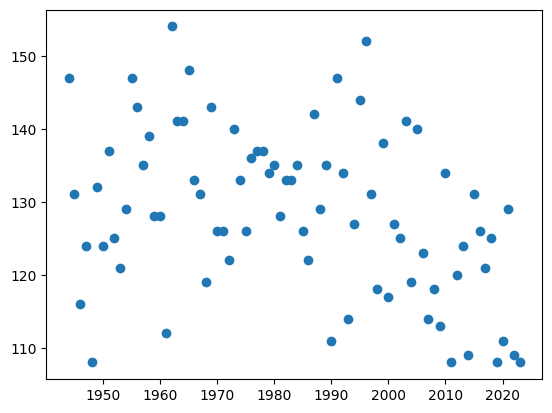

In [16]:
plt.figure

plt.scatter(x=df_summer_arrival_original['Year'], y=df_summer_arrival_original['Day_no'])
plt.yticks()
plt.show()

Plot adjusted summer arrival

In [17]:
summer_years_adjusted = []

for i in summer_dates_adjusuted:
    year = int(i.year)
    summer_years_adjusted.append(year)


In [18]:
df_summer_arrival_adjusted = pd.DataFrame({'Year': summer_years_adjusted, 'Day_no': day_of_summer_arrival_adjusted})

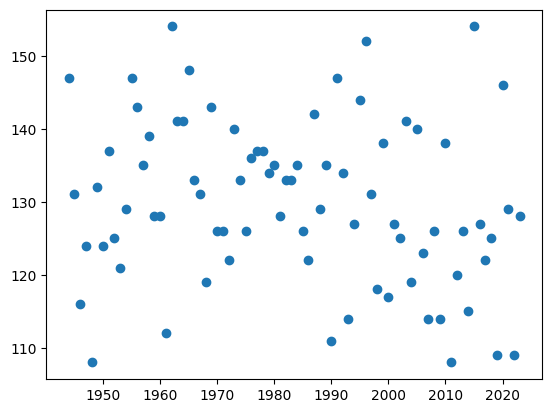

In [19]:
plt.figure

plt.scatter(x=df_summer_arrival_adjusted['Year'], y=df_summer_arrival_adjusted['Day_no'])
plt.yticks()
plt.show()

Plot original winter arrival

In [20]:
winter_years_original = []

for i in winter_dates_original:
    year = int(i.year)
    winter_years_original.append(year)

In [21]:
df_winter_arrival_original = pd.DataFrame({'Year': winter_years_original, 'Day_no': day_of_winter_arrival_original})

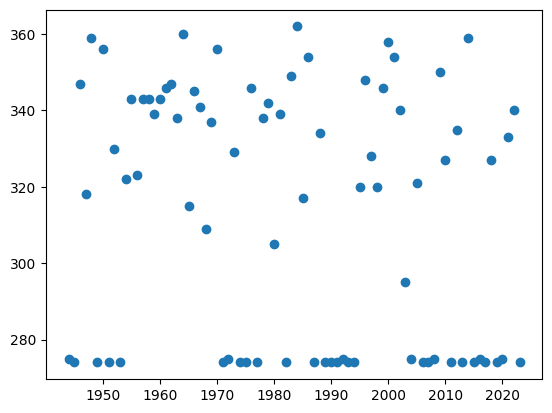

In [22]:
plt.figure

plt.scatter(x=df_winter_arrival_original['Year'], y=df_winter_arrival_original['Day_no'])
plt.yticks()
plt.show()

Plot adjusted winter arrival

In [23]:
winter_years_adjusted = []

for i in winter_dates_adjusted:
    year = int(i.year)
    winter_years_adjusted.append(year)

In [24]:
df_winter_arrival_adjusted = pd.DataFrame({'Year': winter_years_adjusted, 'Day_no': day_of_winter_arrival_adjusted})

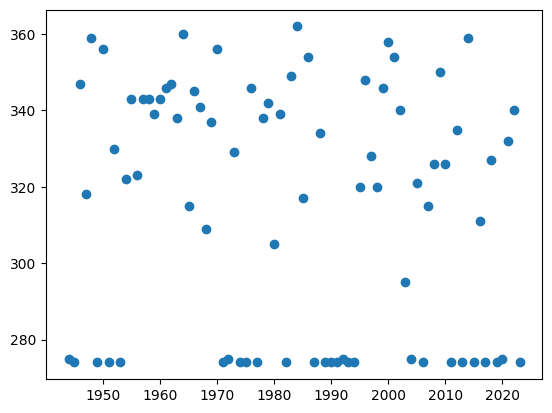

In [25]:
plt.figure

plt.scatter(x=df_winter_arrival_adjusted['Year'], y=df_winter_arrival_adjusted['Day_no'])
plt.yticks()
plt.show()

Compare

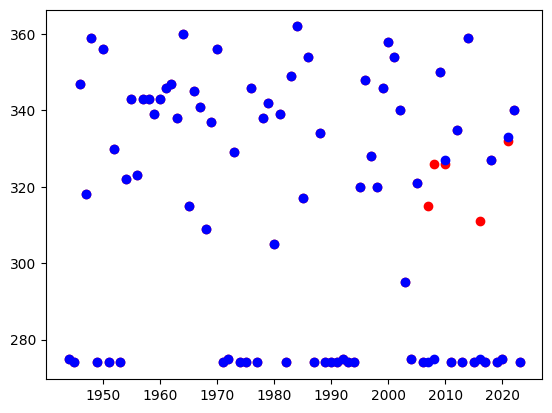

In [26]:
plt.figure

plt.scatter(x=df_winter_arrival_adjusted['Year'], y=df_winter_arrival_adjusted['Day_no'], c='r')
plt.scatter(x=df_winter_arrival_original['Year'], y=df_winter_arrival_original['Day_no'], c='b')
plt.yticks()
plt.show()

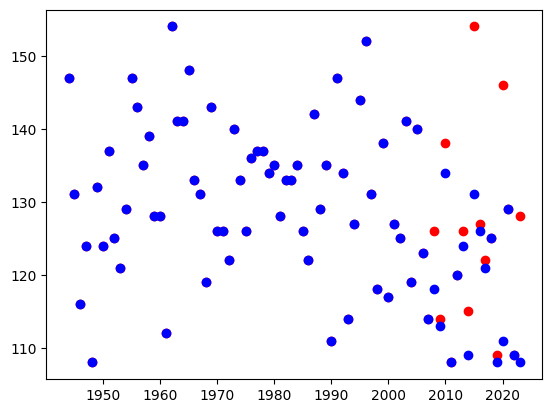

In [27]:
plt.figure

plt.scatter(x=df_summer_arrival_adjusted['Year'], y=df_summer_arrival_adjusted['Day_no'], c='r')
plt.scatter(x=df_summer_arrival_original['Year'], y=df_summer_arrival_original['Day_no'], c='b')
plt.yticks()
plt.show()

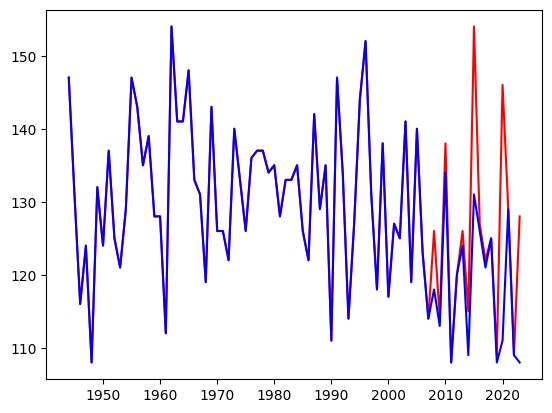

In [35]:
plt.figure
plt.plot(df_summer_arrival_adjusted['Year'], df_summer_arrival_adjusted['Day_no'], 'r')
plt.plot(df_summer_arrival_original['Year'], df_summer_arrival_original['Day_no'], 'b')
plt.show()